In [1]:
"""
Questions
Which factor influenced a candidate in getting placed?
Does percentage matters for one to get placed?
Which degree specialization is much demanded by corporate?
Play with the data conducting all statistical tests."""

'\nQuestions\nWhich factor influenced a candidate in getting placed?\nDoes percentage matters for one to get placed?\nWhich degree specialization is much demanded by corporate?\nPlay with the data conducting all statistical tests.'

In [2]:
"""
Tasks:
Multiple Linear Regression
Random Forest
KNN ALgorithm
Simple linear regression
T-test
GGplot
One Way Anova
EDA Vizualization"""

'\nTasks:\nMultiple Linear Regression\nRandom Forest\nKNN ALgorithm\nSimple linear regression\nT-test\nGGplot\nOne Way Anova\nEDA Vizualization'

In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the csv file
datam=pd.read_csv("D:/Spyder/Data-Envelopment-Analysis-Excel/Data/factors-affecting-campus-placement/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
datam

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
datam.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# General informations

In [6]:
# Columns meaning
# sl_no = Serial Number
# gender = Male or Female
# ssc_p = senior sceondary percentage (10)
# ssc_b = senior secondary board
# hsc_p = higher secondary percetage (12)
# hsc_b = higher secondary board (12)
# hsc_s = higher secondary stream (12)
# degree_p = degree percentage (UG)
# degree_t = degree type (UG)
# workex = work experience
# etest_p = its a test percentage
# specialisation = the specialisation you are doing in MBA
# mba_p = MBA Percentage
# status = are you placed or not
# salary = package 

In [7]:
print("dataset size:{0}\ndataset dimension: {1}\ndataset Shape{2}".format(datam.size, datam.ndim, datam.shape))

dataset size:3225
dataset dimension: 2
dataset Shape(215, 15)


In [8]:
for i in datam:
    print("{0}={1}".format(i,datam[i].unique()))

sl_no=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
gender=['M' 'F']
ssc_p=[67.   79.33 65.   56.   85.8  55.   46.   82.   73.   58.   69.6  47.
 77.   62.   63.   60.   79

In salary, there's a type called nan, which will hinder our process, so we will be replacing every nan by -1, 
where -1 means no salary

In [9]:
datam["salary"]=datam['salary'].fillna((-1)) #column.fillna((value)) to replace nan with value in that column

In [10]:
datam["salary"].unique()

array([ 2.70e+05,  2.00e+05,  2.50e+05, -1.00e+00,  4.25e+05,  2.52e+05,
        2.31e+05,  2.60e+05,  2.18e+05,  3.00e+05,  2.36e+05,  2.65e+05,
        3.93e+05,  3.60e+05,  2.40e+05,  3.50e+05,  2.78e+05,  3.20e+05,
        4.11e+05,  2.87e+05,  2.04e+05,  4.50e+05,  2.16e+05,  2.20e+05,
        2.68e+05,  2.75e+05,  3.36e+05,  2.30e+05,  5.00e+05,  4.00e+05,
        2.10e+05,  4.20e+05,  3.80e+05,  2.80e+05,  2.76e+05,  9.40e+05,
        2.25e+05,  2.33e+05,  6.90e+05,  3.40e+05,  2.55e+05,  2.85e+05,
        2.90e+05,  6.50e+05,  2.64e+05,  2.95e+05])

# General exploration

Text(0.5, 1.0, 'Serial Number Histogram')

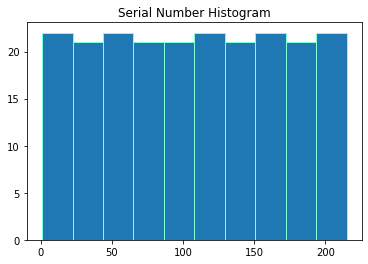

In [11]:
plt.hist(datam["sl_no"], edgecolor="#7FFFD4")
plt.title("Serial Number Histogram")

Text(0.5, 1.0, 'Senior Seconday Percentage Histogram')

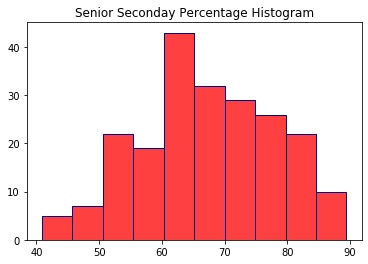

In [12]:
plt.hist(datam["ssc_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Senior Seconday Percentage Histogram")

Text(0.5, 1.0, 'Senior Seconday Board Histogram')

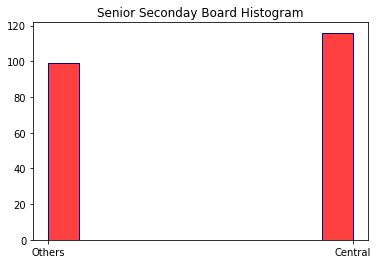

In [13]:
plt.hist(datam["ssc_b"], color="#FF4040", edgecolor="#00008B")
plt.title("Senior Seconday Board Histogram")

Text(0.5, 1.0, 'Higher Seconday Percentage Histogram')

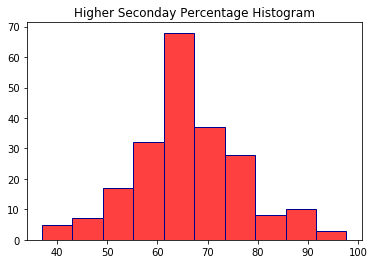

In [14]:
plt.hist(datam["hsc_p"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Percentage Histogram")

Text(0.5, 1.0, 'Higher Seconday Board Histogram')

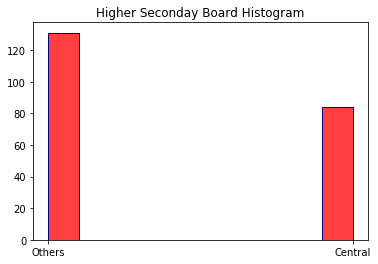

In [15]:
plt.hist(datam["hsc_b"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Board Histogram")

Text(0.5, 1.0, 'Higher Seconday Stream Histogram')

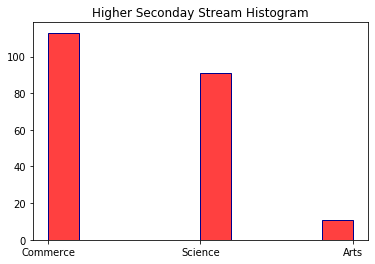

In [16]:
plt.hist(datam["hsc_s"], color="#FF4040", edgecolor="#00008B")
plt.title("Higher Seconday Stream Histogram")

# Let's try making One way anova

In [17]:
"""The Director of the B-School would like to understand 
the impact of type of Degree (degreet) on the average MBA percentage (mbap). 
Use the one-way ANOVA to check the impact at alpha = 0.05. Show the summary of the model. 
Perform a diagnostic check using Bartlett test to check for assumption of homogeneity of variance."""

'The Director of the B-School would like to understand \nthe impact of type of Degree (degreet) on the average MBA percentage (mbap). \nUse the one-way ANOVA to check the impact at alpha = 0.05. Show the summary of the model. \nPerform a diagnostic check using Bartlett test to check for assumption of homogeneity of variance.'

In [18]:
#Since degree_t is of categorical type, we have to make it numeral type
#So as to perform the computation
#for this we are making an entire different datatype
datam1=datam.copy(deep=True)

In [19]:
dummy=pd.get_dummies(datam1["degree_t"])
dummy

,Comm&Mgmt,Others,Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
210,1,0,0
211,0,0,1
212,1,0,0
213,1,0,0


In [21]:
datam1=pd.concat([datam1,dummy], axis=1)

In [46]:
datam1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Comm&Mgmt,Others,Sci&Tech
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,1,0,0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,-1.0,0,0,1
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0,1,0,0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0,0,0,1
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0,1,0,0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0,1,0,0


In [23]:
datat=pd.concat([datam1['mba_p'],dummy], axis=1)
datat

,mba_p,Comm&Mgmt,Others,Sci&Tech
0,58.80,0,0,1
1,66.28,0,0,1
2,57.80,1,0,0
3,59.43,0,0,1
4,55.50,1,0,0
...,...,...,...,...
210,74.49,1,0,0
211,53.62,0,0,1
212,69.72,1,0,0
213,60.23,1,0,0


In [45]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = stats.f_oneway(datat['Comm&Mgmt'], datat['Others'], datat['Sci&Tech'], datat['mba_p'])
print(fvalue, pvalue)

23915.951401285296 0.0


In [25]:
data_new=pd.melt(datat.reset_index(), id_vars=['index'], value_vars=['mba_p',"Sci&Tech",'Others','Comm&Mgmt'])
data_new.columns=['index','treatments','value']

In [26]:
data_new

,index,treatments,value
0,0,mba_p,58.80
1,1,mba_p,66.28
2,2,mba_p,57.80
3,3,mba_p,59.43
4,4,mba_p,55.50
...,...,...,...
855,210,Comm&Mgmt,1.00
856,211,Comm&Mgmt,0.00
857,212,Comm&Mgmt,1.00
858,213,Comm&Mgmt,1.00


In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
model=ols('value ~ C(treatments)', data=data_new).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.392e+04
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        00:05:15   Log-Likelihood:                -2144.8
No. Observations:                 860   AIC:                             4298.
Df Residuals:                     856   BIC:                             4317.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.6744      0.200      3.367      0.001       0.281       1.068
C(treatments)[T.Others]      -0.6233      0.283     -2.200      0.028      -1.179      -0.067
C(treatments)[T.Sci&Tech]    -0.4000      0.283     -1.412      0.158      -0.956       0.156
C(treatments)[T.mba_p]       61.6038      0.283    217.493      0.000      61.048      62.160
==============================================================================
Omnibus:                      173.920   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1699.941
Skew:                           0.611   Prob(JB):                         0.00
Kurtosis:                       9.779   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
anov_table=sm.stats.anova_lm(model, typ=1)
anov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,618785.697917,206261.899306,23915.951401,0.0
Residual,856.0,7382.528207,8.624449,NaN,NaN


#### since pvalue from ANOVA is significant i.e., pvalue>0.05, hence we conclude that there aren't significant differences

In [31]:
#to know the pairs of signufucant different treaments
#lets perform mmultiple pairwise comparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

m_comp=pairwise_tukeyhsd(endog=data_new['value'], groups=data_new['treatments'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
Comm&Mgmt   Others  -0.6233 0.1241 -1.3524  0.1058  False
Comm&Mgmt Sci&Tech     -0.4 0.4923 -1.1291  0.3291  False
Comm&Mgmt    mba_p  61.6038  0.001 60.8747 62.3329   True
   Others Sci&Tech   0.2233 0.8428 -0.5058  0.9524  False
   Others    mba_p   62.227  0.001 61.4979 62.9561   True
 Sci&Tech    mba_p  62.0038  0.001 61.2747 62.7329   True
---------------------------------------------------------


In [40]:
#Tukey HSD shows that 1st, 2nd & 4th accepts the null hypothesis.
#lets do Shapiro-Wilk test to check whether the data is drawn from normal distribution or not
#null hypothesis = data is normally distributed
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.7162120938301086 9.173672277708441e-36


##### since pvalue is significant, i.e., p<0.05, we reject our null hypothesis

In [41]:
#Bartlett test checks the homogeneity of variances.
#Null hypothesis is that samples from populatons have equal variance

import scipy.stats as stats
w,pval=stats.bartlett(datat['mba_p'],datat['Comm&Mgmt'],datat['Others'],datat['Sci&Tech'])
print(w,pval)

2399.0654979862056 0.0


##### since pvalue is significant i.e., pvalue<0.05, therefore we reject our null hypothesis 